## R/Tea User Choice Tagging and Analysis

This project is some practice webscraping and data transformation, primarily for creating tags based off the text for basic analysis. 
This is personally motivated by wanting to have a better idea of what the user choice table has to offer. Tea comes in multiple processing styles, but the current table on the Tea subreddit lacks a giving certain tags to easily find them. Often the description will give it, but there is no easy way on the webpage to find/filter for it. Thus, this is be practice of transforming the description into a form to the tags.

Packages used:

In [205]:
import requests
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
%matplotlib inline 

Now we need to get the table from the Reddit page. There are three tables on the page, so we need to grab the vendor tables and leave out the one that gives out brewing instructions, since that one is unnecessary and lacks any of the desired information.

In [5]:
url = 'https://www.reddit.com/r/tea/wiki/vendors/page_01'
html = requests.get(url).content
df_list = pd.read_html(html)
print(df_list)

[    Unnamed: 0 Rank                  Vendor/Website Link  \
0          NaN    1  Yunnan Sourcing& Yunnan Sourcing US   
1          NaN    2                            White2Tea   
2          NaN    3                    Crimson Lotus Tea   
3          NaN    4                             What-Cha   
4          New    5                             Mei Leaf   
..         ...  ...                                  ...   
120        NaN    -     Tea Gschwendner also German site   
121        NaN    -                 Tea Makers of London   
122        NaN    -                   Towshend's Tea Co.   
123        New    -                     Valley Brook Tea   
124        New    -                           WumiMatcha   

                         Reddit User / Vendor Comments Shipping Origin  \
0    "Fantastic range of teas from Yunnan province,...     China & USA   
1    "Sells a highly curated selection of self-pres...           China   
2    "A small start-up devoted to selling self-pres...  

As we can see, the last table has the brewing information, so the first two tables are needed. Since the dimensions of the tables are not the same, we need to correct that by dropping the 2 left columns on the first table, since that column is not useful.

In [8]:
df1 = df_list[0]
df1.head()

,Unnamed: 0,Rank,Vendor/Website Link,Reddit User / Vendor Comments,Shipping Origin,Shipping Range
0,NaN,1,Yunnan Sourcing& Yunnan Sourcing US,"""Fantastic range of teas from Yunnan province,...",China & USA,International
1,NaN,2,White2Tea,"""Sells a highly curated selection of self-pres...",China,International
2,NaN,3,Crimson Lotus Tea,"""A small start-up devoted to selling self-pres...",China,International
3,NaN,4,What-Cha,"""UK-based shop with a large catalogue of quali...",UK,International
4,New,5,Mei Leaf,"""Online vendor and teahouse sourcing a wide se...",UK,International


In [9]:
df2 = df_list[1]
df2.head()

,Vendor/Website Link,Reddit User / Vendor Comments,Shipping Origin,Shipping Range
0,Arbor Teas,"Large selection of organic loose leaf tea, unf...","Ann Arbor, Michigan (USA)",USA and Canada
1,BANGtea,"""BANGtea sources award-winning small, batch oo...",USA,USA & Canada
2,Darjeeling Tea Boutique,"""A single Estate Premium Darjeeling store.""",India,International
3,Golden Tips,"""Specializes in Indian teas, and a great sourc...",India,International
4,Good Life Tea,"Their tea shop philosophy: ""Relax, Refresh, Re...",USA,USA


In [13]:
df1_edited = df1.drop(columns = ['Unnamed: 0','Rank'])
df1_edited.head()

,Vendor/Website Link,Reddit User / Vendor Comments,Shipping Origin,Shipping Range
0,Yunnan Sourcing& Yunnan Sourcing US,"""Fantastic range of teas from Yunnan province,...",China & USA,International
1,White2Tea,"""Sells a highly curated selection of self-pres...",China,International
2,Crimson Lotus Tea,"""A small start-up devoted to selling self-pres...",China,International
3,What-Cha,"""UK-based shop with a large catalogue of quali...",UK,International
4,Mei Leaf,"""Online vendor and teahouse sourcing a wide se...",UK,International


In [18]:
df_combined = df1_edited.append(df2)

Now that the combined table has been made, it is now time to create the formula to create the key and apply it as a formula to create the values for a new column. These terms are assigned from personal knowledge, and not extensive. For anyone going through this section and willing to contribute, please let me know. 
Note: the use of the comments is due to the fact that the shipping origin is not a strong indication of the style of tea the vendor provides. For example, vendor that ships in the USA could sell Chinese or Japanese styles of tea.

In [128]:
CHN = ['china','chinese','guangdong','hong', 'kong','yunnan']
JPN = ['japan','japanese', 'sencha', 'gyokuro','uji','matcha']
IND = ['india','indian', 'assam','chai']
KOR = ['korea','korean', 'jeju']
VTN = ['vietnam','vietnamese']
TWN = ['taiwan', 'taiwanese']

stylekey = [CHN, JPN, IND, KOR, VTN, TWN]

stylekey2 = ['Chinese', 'Japanese', 'Indian', 'Korean', 'Vietnamese', 'Taiwanese']

def style(x):
    styletype = []
    for i in range(len(x.lower().split())): #goes through the comment string and makes all letters lowercase and split into list by ""
        for j in range(len(stylekey)):
                   if  x.lower().split()[i] in stylekey[j]:
                        if stylekey2[j] not in styletype: #checks and prevents duplicate tags
                            styletype.append(stylekey2[j]) #this adds tags not yet added yet
    return styletype

In [131]:
#reformatting comment section to apply formula
df_combined['Reddit User / Vendor Comments']=df_combined['Reddit User / Vendor Comments'].astype(str)

def nopunct(some_str):
    nopunct_str = some_str.translate(str.maketrans(' ', ' ', string.punctuation))
    return nopunct_str

df_combined['Comments without Punctuation'] = df_combined['Reddit User / Vendor Comments']

for i in range(len(df_combined['Comments without Punctuation'])):
    df_combined['Comments without Punctuation'].iloc[i] = nopunct(df_combined['Comments without Punctuation'].iloc[i])
    
df_combined.head()

,Vendor/Website Link,Reddit User / Vendor Comments,Shipping Origin,Shipping Range,Comments without Punctuation,Style Type
0,Yunnan Sourcing& Yunnan Sourcing US,"""Fantastic range of teas from Yunnan province,...",China & USA,International,Fantastic range of teas from Yunnan province C...,[Chinese]
1,White2Tea,"""Sells a highly curated selection of self-pres...",China,International,Sells a highly curated selection of selfpresse...,[]
2,Crimson Lotus Tea,"""A small start-up devoted to selling self-pres...",China,International,A small startup devoted to selling selfpressed...,[]
3,What-Cha,"""UK-based shop with a large catalogue of quali...",UK,International,UKbased shop with a large catalogue of quality...,[Japanese]
4,Mei Leaf,"""Online vendor and teahouse sourcing a wide se...",UK,International,Online vendor and teahouse sourcing a wide sel...,"[Chinese, Taiwanese, Japanese]"


In [134]:
df_combined['Style Type'] = df_combined['Comments without Punctuation'].apply(style)
df_combined.head()

,Vendor/Website Link,Reddit User / Vendor Comments,Shipping Origin,Shipping Range,Comments without Punctuation,Style Type
0,Yunnan Sourcing& Yunnan Sourcing US,"""Fantastic range of teas from Yunnan province,...",China & USA,International,Fantastic range of teas from Yunnan province C...,[Chinese]
1,White2Tea,"""Sells a highly curated selection of self-pres...",China,International,Sells a highly curated selection of selfpresse...,[]
2,Crimson Lotus Tea,"""A small start-up devoted to selling self-pres...",China,International,A small startup devoted to selling selfpressed...,[]
3,What-Cha,"""UK-based shop with a large catalogue of quali...",UK,International,UKbased shop with a large catalogue of quality...,[Japanese]
4,Mei Leaf,"""Online vendor and teahouse sourcing a wide se...",UK,International,Online vendor and teahouse sourcing a wide sel...,"[Chinese, Taiwanese, Japanese]"


Now that we have tags for the style, we can start looking into some trends, like how many vendors of Japanese tea are there. 

In [150]:
df_combined['Style Type (List)'] = df_combined['Style Type'].apply(', '.join)
df_combined['Style Type (List)'] 

0                          Chinese
1                                 
2                                 
3                         Japanese
4     Chinese, Taiwanese, Japanese
                  ...             
37                         Chinese
38                                
39              Chinese, Taiwanese
40              Chinese, Taiwanese
41                                
Name: Style Type (List), Length: 167, dtype: object

In [166]:
df_combined.groupby('Style Type (List)').count().reset_index()

,Style Type (List),Vendor/Website Link,Reddit User / Vendor Comments,Shipping Origin,Shipping Range,Comments without Punctuation,Style Type
0,,92,92,75,72,92,92
1,Chinese,28,28,25,25,28,28
2,"Chinese, Japanese, Korean, Taiwanese",1,1,1,1,1,1
3,"Chinese, Taiwanese",3,3,2,2,3,3
4,"Chinese, Taiwanese, Japanese",2,2,2,2,2,2
5,Indian,5,5,5,4,5,5
6,"Indian, Japanese",1,1,1,1,1,1
7,Japanese,19,19,14,15,19,19
8,Korean,1,1,1,1,1,1
9,Taiwanese,10,10,9,10,10,10


Unfortunately, the description may have not been enough to specify 92 sites. Adjusting the style key can increase the number of provided tags, if the descriptions have any more key words. Below, I look into some of the cases to check how accurate the labelling was.

In [153]:
df_combined[df_combined['Style Type (List)'] == 'Vietnamese']

,Vendor/Website Link,Reddit User / Vendor Comments,Shipping Origin,Shipping Range,Comments without Punctuation,Style Type,Style Type (List)
45,Hatvala,"""Direct sourced single origin wild teas from V...",Vietnam,Worldwide,Direct sourced single origin wild teas from Vi...,[Vietnamese],Vietnamese


In [155]:
df_combined[df_combined['Style Type (List)'] == 'Indian, Japanese']

,Vendor/Website Link,Reddit User / Vendor Comments,Shipping Origin,Shipping Range,Comments without Punctuation,Style Type,Style Type (List)
76,ANGEL SPECIALTY PRODUCTS,"""Highest quality specialty teas and chai. Manu...",USA,International,Highest quality specialty teas and chai Manufa...,"[Indian, Japanese]","Indian, Japanese"


In [158]:
df_combined['Comments without Punctuation'].iloc[76]

'Highest quality specialty teas and chai Manufacturer of premium crafted Matcha Taro and Milk Tea for bubble tea and boba industry Supplier to various 5 star restaurants hotels cafes and boutique beverage shops Wholesale and retail'

In [160]:
not_categorized = df_combined[df_combined['Style Type (List)'] == '']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

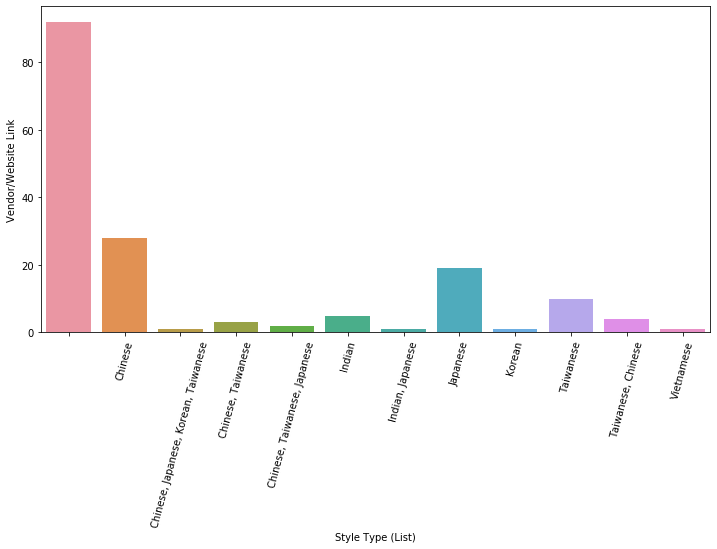

In [190]:
plt.figure(figsize=(12,6))
sns.barplot(x='Style Type (List)', y='Vendor/Website Link', data=df_combined.groupby('Style Type (List)').count().reset_index())
plt.xticks(rotation=75)

Here we can see that the most common tea styles being promoted on the User Choice Recommendations are Chinese, Japanese, and Taiwanese. Since China has the highest production of tea (See: https://en.wikipedia.org/wiki/Tea), and typically the country of production is the were the processing of tea also occurs, it makes sense that out of the tagged vendors, Chinese is the highest amount (more so considering the Chinese bar only includes vendors tagged ONLY for Chinese, and thus we would need to include the vendors for 'Chinese, Taiwanese' and the similar). 

For fun, lets look to see if there is any relationship between the length of descriptions and either the tea style or origin of shipping.

In [211]:
df_combined['Number of Characters in Comment'] = df_combined['Reddit User / Vendor Comments'].apply(lambda x: len(x))

In [212]:
df_combined.head()

,Vendor/Website Link,Reddit User / Vendor Comments,Shipping Origin,Shipping Range,Comments without Punctuation,Style Type,Style Type (List),Number of Characters in Comment
0,Yunnan Sourcing& Yunnan Sourcing US,"""Fantastic range of teas from Yunnan province,...",China & USA,International,Fantastic range of teas from Yunnan province C...,[Chinese],Chinese,185
1,White2Tea,"""Sells a highly curated selection of self-pres...",China,International,Sells a highly curated selection of selfpresse...,[],,152
2,Crimson Lotus Tea,"""A small start-up devoted to selling self-pres...",China,International,A small startup devoted to selling selfpressed...,[],,103
3,What-Cha,"""UK-based shop with a large catalogue of quali...",UK,International,UKbased shop with a large catalogue of quality...,[Japanese],Japanese,246
4,Mei Leaf,"""Online vendor and teahouse sourcing a wide se...",UK,International,Online vendor and teahouse sourcing a wide sel...,"[Chinese, Taiwanese, Japanese]","Chinese, Taiwanese, Japanese",104


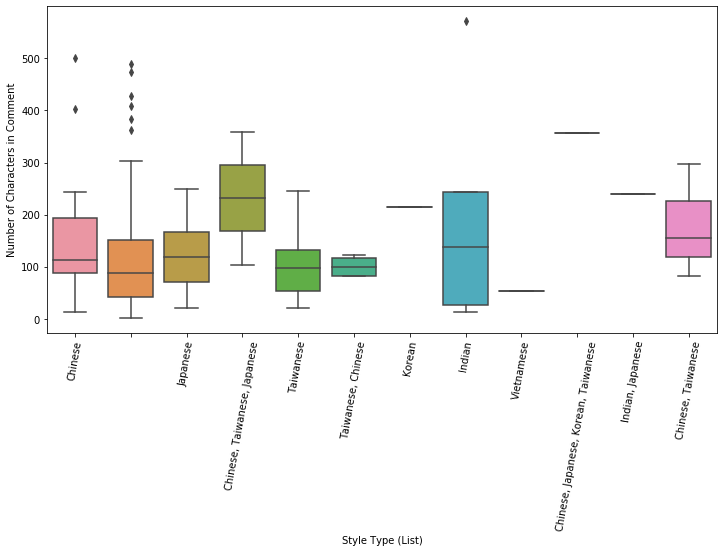

In [219]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=80)
sns.boxplot(data=df_combined, x='Style Type (List)', y='Number of Characters in Comment')

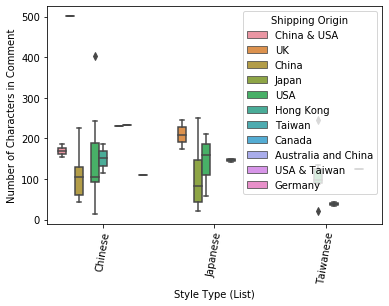

In [234]:
plt.xticks(rotation=80)
sns.boxplot(data=df_combined[(df_combined['Style Type (List)'] == 'Japanese') | (df_combined['Style Type (List)'] == 'Chinese') | (df_combined['Style Type (List)'] == 'Taiwanese')], x='Style Type (List)', y='Number of Characters in Comment', hue = 'Shipping Origin')

In [231]:
df_combine_sub = df_combined[(df_combined['Style Type (List)'] == 'Japanese') | (df_combined['Style Type (List)'] == 'Chinese') | (df_combined['Style Type (List)'] == 'Taiwanese')]
df_combine_sub = df_combine_sub[['Style Type (List)','Number of Characters in Comment']].reset_index()
df_combine_sub.groupby('Style Type'

,index,Style Type (List),Number of Characters in Comment
0,0,Chinese,185
1,3,Japanese,246
2,5,Chinese,225
3,6,Japanese,176
4,8,Chinese,153
5,9,Taiwanese,100
6,11,Chinese,114
7,12,Chinese,106
8,19,Chinese,56
9,21,Japanese,53
